## Data analysis

In [328]:
#import required libraries
import pandas as pd
import numpy as np
from pandasql import sqldf

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [329]:
#import file
df = pd.read_csv('data/RentalsCanada.csv')
df.head()

,REF_DATE,GEO,DGUID,Type_of_structure,Type_of_unit,VECTOR,COORDINATE,VALUE
0,2012,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050524505,Row and apartment structures of three units an...,Bachelor units,v3822825,37.3.1,528.0
1,2012,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050524505,Row and apartment structures of three units an...,One bedroom units,v3822959,37.3.2,628.0
2,2012,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050524505,Row and apartment structures of three units an...,Two bedroom units,v3823093,37.3.3,744.0
3,2012,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050524505,Row and apartment structures of three units an...,Three bedroom units,v3823227,37.3.4,835.0
4,2012,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",2011S050524505,Row structures of three units and over,Two bedroom units,v3823629,37.2.3,795.0


### 1.Provide one or more visualizations that clearly explain how rental costs have changed in the Ottawa-Gatineau area over the last 10 years


In [330]:
#Selecting data for 'Ottawa-Gatineau, Ontario/Quebec' region with aggregated average values and their percentage contribution

Ottawa_Gatineau = sqldf('''select REF_DATE,AVG(VALUE) as avg_value, AVG(VALUE) * 100.0 / sum(AVG(VALUE)) over()  as proc_avg_value
from df 
where GEO='Ottawa-Gatineau, Ontario/Quebec' and REF_DATE>2012
group by REF_DATE
order by REF_DATE
''')

In [331]:
Ottawa_Gatineau.head()

,REF_DATE,avg_value,proc_avg_value
0,2013,977.000000,8.671906
1,2014,981.533333,8.712144
2,2015,1006.200000,8.931086
3,2016,1014.066667,9.000911
4,2017,1052.866667,9.345302


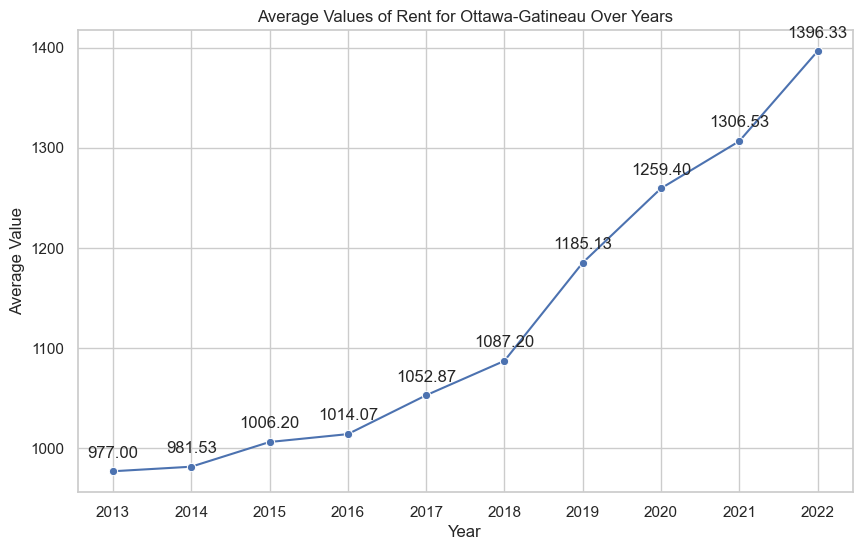

In [333]:
# Assuming Ottawa_Gatineau is a list of dictionaries or a similar data structure
df_1 = pd.DataFrame(Ottawa_Gatineau)

# Set the style for the plot (whitegrid style)
sns.set(style="whitegrid")

# Create a line chart with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='REF_DATE', y='avg_value', data=df_1, marker='o')

# Set title and axis labels
plt.title('Average Values of Rent for Ottawa-Gatineau Over Years')
plt.xlabel('Year')
plt.ylabel('Average Value')


# Display every year on the x-axis
plt.xticks(df_1['REF_DATE'].unique())

# Annotate each point with its value
for index, row in df_1.iterrows():
    plt.annotate(f'{row["avg_value"]:.2f}', (row['REF_DATE'], row['avg_value']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the line chart
plt.show()

In [334]:
# Calculate percentage growth between the first and last year
first_year_avg = df_1.loc[df_1['REF_DATE'] == df_1['REF_DATE'].min(), 'avg_value'].values[0]
last_year_avg = df_1.loc[df_1['REF_DATE'] == df_1['REF_DATE'].max(), 'avg_value'].values[0]
percentage_growth = ((last_year_avg - first_year_avg) / first_year_avg) * 100

# Print the calculated percentage growth
print(f"Percentage growth between the first and last year: {percentage_growth:.2f}%")


Percentage growth between the first and last year: 42.92%


#### Observations:
- The average rent price for Ottawa-Gatineau has been exponentially increasing over the last ten years.
- The average rental price in Ottawa-Gatineau has experienced a remarkable growth of 42.92% from the first to the last year.

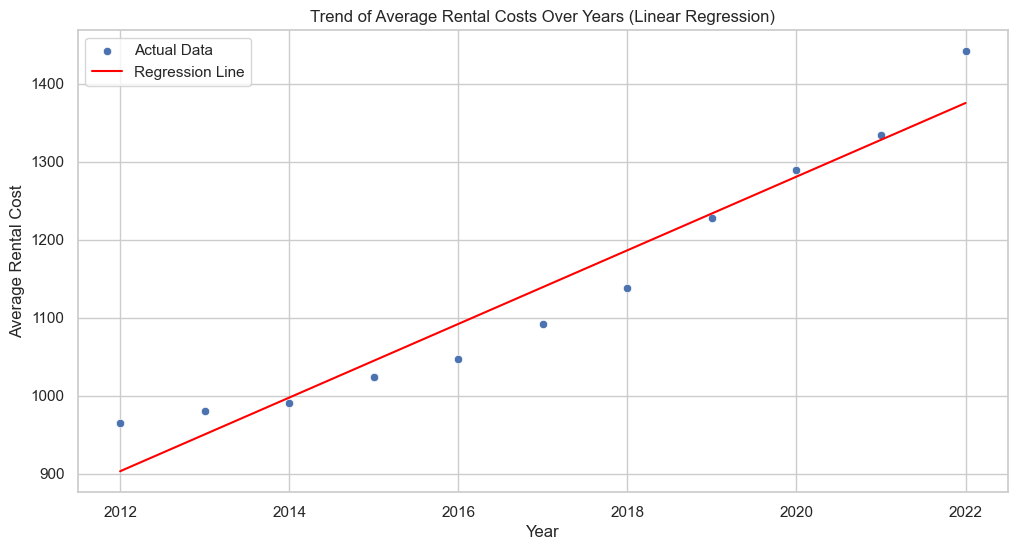

Slope is:  47.214610146407914 Intercept is:  -94092.6281064878 R-Squared is:  0.9375634289735963


In [395]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Import the module for linear regression

from sklearn.linear_model import LinearRegression
import numpy as np

# Grouping data by year and calculating the average rental cost
yearly_avg_rental = df.groupby('REF_DATE')['VALUE'].mean().reset_index()

# Reshaping the data for use in linear regression
X = yearly_avg_rental['REF_DATE'].values.reshape(-1, 1)  # Independent variable (Year)
y = yearly_avg_rental['VALUE'].values  # Dependent variable (Average Rental Cost)

# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R-squared value
r_squared = model.score(X, y)

# Preparing data for plotting the regression line
regression_line = (slope * X) + intercept

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='REF_DATE', y='VALUE', data=yearly_avg_rental, label='Actual Data')
plt.plot(yearly_avg_rental['REF_DATE'], regression_line, color='red', label='Regression Line')
plt.title('Trend of Average Rental Costs Over Years (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Average Rental Cost')
plt.legend()
plt.grid(True)
plt.show()

print("Slope is: ",slope,\
      "Intercept is: ", intercept,\
        "R-Squared is: ", r_squared)

#### Observations:
- Slope:47.21. This indicates that, on average, the rental cost has increased by aproximately $47.21 dollars per year.

- R-squared:0.938. The linear model explains a significant portion 93.8% of the variance in rental costs over time.

#### a)How this change differs between Ontario and Quebec

In [335]:
#selecting data set using SQL
Ottawa_Gatineau_part = sqldf('''select REF_DATE,GEO,AVG(VALUE) as avg_value
from df 
where GEO in  ('Ottawa-Gatineau, Ontario part, Ontario/Quebec','Ottawa-Gatineau, Quebec part, Ontario/Quebec') and REF_DATE>2012
group by REF_DATE,GEO
order by REF_DATE
''')

In [336]:
Ottawa_Gatineau_part.head()

,REF_DATE,GEO,avg_value
0,2013,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",1064.600000
1,2013,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",714.214286
2,2014,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",1068.733333
3,2014,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",713.714286
4,2015,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",1091.266667


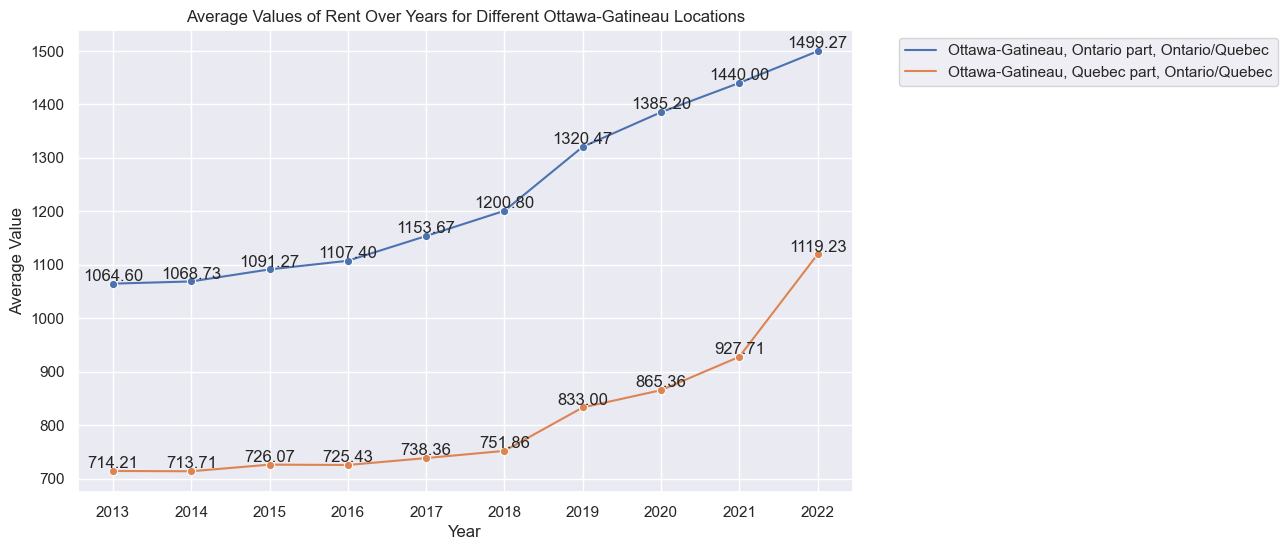

In [337]:
# Assuming Ottawa_Gatineau_part is a list of dictionaries
df_2 = pd.DataFrame(Ottawa_Gatineau_part)

# Set the style for the plot
sns.set(style="darkgrid")

# Create a line chart with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='REF_DATE', y='avg_value', hue='GEO', marker='o', data=df_2)

# Set labels and title
plt.title('Average Values of Rent Over Years for Different Ottawa-Gatineau Locations')
plt.xlabel('Year')
plt.ylabel('Average Value')

# Annotate each point with its value in the legend for all years
for geo in df_2['GEO'].unique():
    geo_data = df_2[df_2['GEO'] == geo]
    for index, row in geo_data.iterrows():
        plt.text(row['REF_DATE'], row['avg_value'], f'{row["avg_value"]:.2f}', ha='center', va='bottom')

# Display every year on the x-axis
plt.xticks(df_2['REF_DATE'].unique())

# Show the line chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position
plt.show()

In [400]:
# Calculate percentage growth between the first and last year for each location
for geo in df_2['GEO'].unique():
    geo_data = df_2[df_2['GEO'] == geo]
    first_year_avg = geo_data.loc[geo_data['REF_DATE'] == geo_data['REF_DATE'].min(), 'avg_value'].values[0]
    last_year_avg = geo_data.loc[geo_data['REF_DATE'] == geo_data['REF_DATE'].max(), 'avg_value'].values[0]
    percentage_growth = ((last_year_avg - first_year_avg) / first_year_avg) * 100
    print(f"Percentage growth for {geo} between the first and last year: {percentage_growth:.2f}%")

Percentage growth for Ottawa-Gatineau, Ontario part, Ontario/Quebec between the first and last year: 40.83%
Percentage growth for Ottawa-Gatineau, Quebec part, Ontario/Quebec between the first and last year: 56.71%


### Observations:
- Rental prices has been historically higher in Ontario than Quebec
- The percentage change in rental prices is higher in Quebec (56.71%) than Ontario (40.83%), a 15.88% difference. 
- From 2013 to 2018, there was a steady increase in rental prices in both provinces, with a growth of 5.27% in Quebec and 12.79% in Ontario, respectively.
- From 2018 to 2022, there was a rapid increase in rental prices in both provinces, with growth rates of 48.86% in Quebec and 24.86% in Ontario, respectively.

In [397]:
ontario_data = df[df['GEO'] =="Ottawa-Gatineau, Ontario part, Ontario/Quebec"]
quebec_data = df[df['GEO'] =="Ottawa-Gatineau, Quebec part, Ontario/Quebec"]

In [398]:
def compare_rental_trends(ontario_data, quebec_data):

    # Aggregate rental costs by year for each region
    ontario_yearly_avg = ontario_data.groupby('REF_DATE')['VALUE'].mean().reset_index()
    quebec_yearly_avg = quebec_data.groupby('REF_DATE')['VALUE'].mean().reset_index()

    # Reshaping the data for use in linear regression
    X_ontario = ontario_yearly_avg['REF_DATE'].values.reshape(-1, 1)
    y_ontario = ontario_yearly_avg['VALUE'].values

    X_quebec = quebec_yearly_avg['REF_DATE'].values.reshape(-1, 1)
    y_quebec = quebec_yearly_avg['VALUE'].values

    # Creating linear regression models for Ontario and Quebec
    model_ontario = LinearRegression()
    model_quebec = LinearRegression()

    model_ontario.fit(X_ontario, y_ontario)
    model_quebec.fit(X_quebec, y_quebec)

    # Visualization
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='REF_DATE', y='VALUE', data=ontario_yearly_avg, label='Ontario Data')
    sns.scatterplot(x='REF_DATE', y='VALUE', data=quebec_yearly_avg, label='Quebec Data')

    plt.plot(ontario_yearly_avg['REF_DATE'], model_ontario.predict(X_ontario), color='blue', label='Ontario Regression Line')
    plt.plot(quebec_yearly_avg['REF_DATE'], model_quebec.predict(X_quebec), color='green', label='Quebec Regression Line')

    plt.title('Trend of Average Rental Costs in Ontario and Quebec')
    plt.xlabel('Year')
    plt.ylabel('Average Rental Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Outputting the slopes and intercepts
    slope_ontario = model_ontario.coef_[0]
    intercept_ontario = model_ontario.intercept_
    r_squared_ontario = model_ontario.score(X_ontario, y_ontario)
    slope_quebec = model_quebec.coef_[0]
    intercept_quebec = model_quebec.intercept_
    r_squared_quebec = model_quebec.score(X_quebec, y_quebec)

    print("Ontario - Slope:", slope_ontario, "Intercept:", intercept_ontario, "Ontario -R-square:", r_squared_ontario)
    print("Quebec - Slope:", slope_quebec, "Intercept:", intercept_quebec, "Quebec -R-square:", r_squared_quebec)

# Usage Example:
# compare_rental_trends(ontario_data, quebec_data)

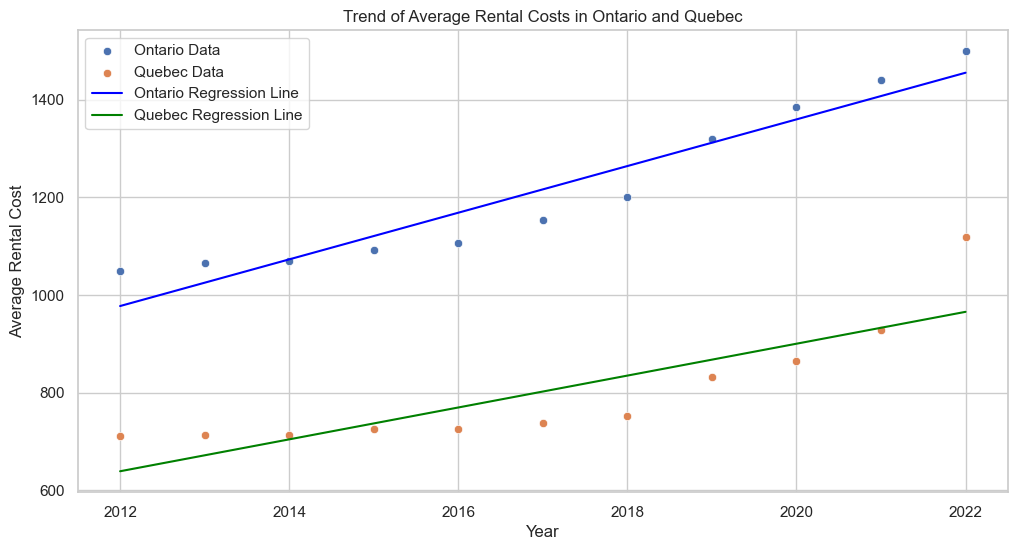

Ontario - Slope: 47.78303030303033 Intercept: -95162.00848484854 Ontario -R-square: 0.9164279948503851
Quebec - Slope: 32.64945054945057 Intercept: -65051.602597402634 Quebec -R-square: 0.7174974518594361


In [399]:
compare_rental_trends(ontario_data, quebec_data)

#### Observations 
- Ontario:
Slope: 47.78. Rental costs increase in ontario by aproximately $47.78 per year.
R2: 0.916. This model can explain 91.6% of the variance in rental costs over time.

- Quebec:
Slope: 32.65 Rental costs increase in quebec by aproximately $32.65 per year.
R2: 0.717. This model can explain 71.7% of the variance in rental costs over time.

In [339]:
#selecting data set using SQL
Ottawa_Gatineau_part_pie = sqldf('''select GEO,AVG(VALUE) * 100.0 / sum(AVG(VALUE)) over() as proc_avg_value
from df 
where GEO in  ('Ottawa-Gatineau, Ontario part, Ontario/Quebec','Ottawa-Gatineau, Quebec part, Ontario/Quebec') and REF_DATE>2012
group by GEO
order by GEO
''')

In [340]:
Ottawa_Gatineau_part_pie.head()

,GEO,proc_avg_value
0,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",60.381481
1,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",39.618519


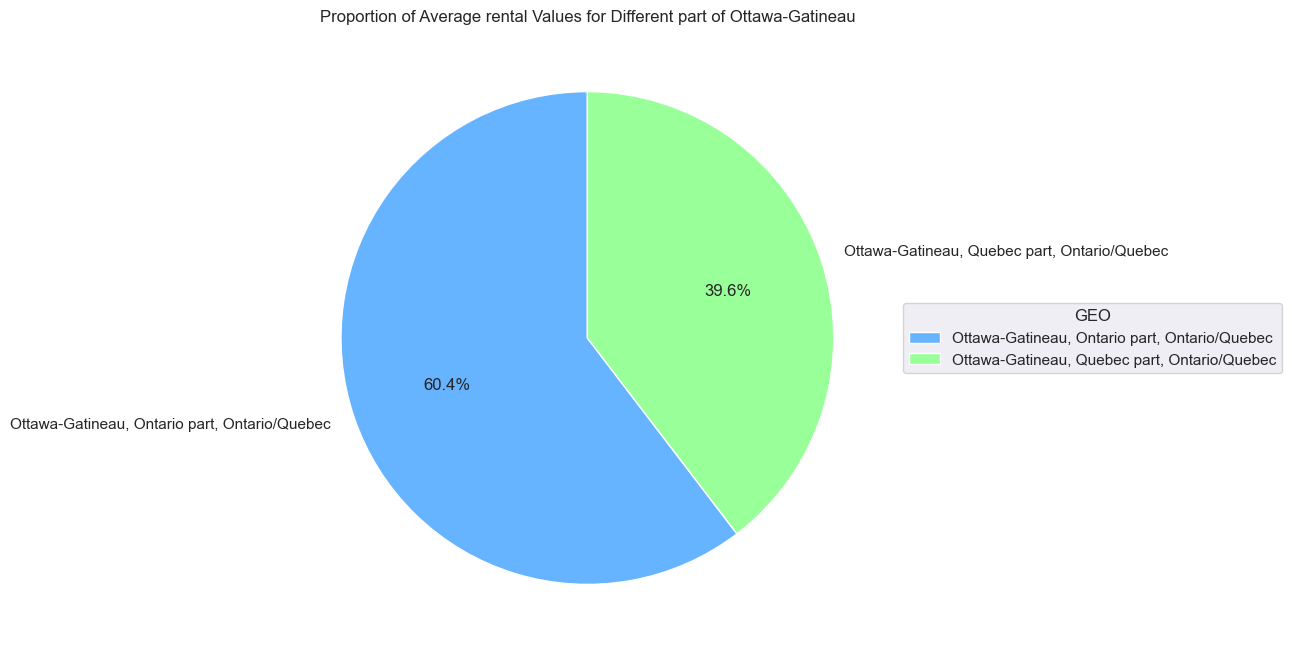

In [341]:
df_3 = pd.DataFrame(Ottawa_Gatineau_part_pie)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(df_3['proc_avg_value'], labels=df_3['GEO'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])

# Adding legend manually
ax.legend(wedges, df_3['GEO'], title="GEO", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set title
plt.title('Proportion of Average rental Values for Different part of Ottawa-Gatineau')

# Show the pie chart
plt.show()

In [342]:
# Calculate and print the percentage difference between the two values for each location
first_value = df_3['proc_avg_value'].iloc[0]
second_value = df_3['proc_avg_value'].iloc[1]
percentage_difference = ((second_value - first_value) / first_value) * 100
print(f"Percentage difference between the two GEO locations: {abs(percentage_difference):.2f}%")

Percentage difference between the two GEO locations: 34.39%


#### Observations
- When comparing Ottawa-Gatineau, Ontario part, Ontario/Quebec, and Ottawa-Gatineau, Quebec part, Ontario/Quebec, we can observe that the average rental price is higher in Ottawa-Gatineau, Ontario part, by 34.39%.


#### b)Visualization(s) that clearly depict how the “Type of Structure” may or may not contribute to different rental pricing

In [343]:
#selecting data set using SQL
Ottawa_Gatineau_2 = sqldf('''select Type_of_structure,Type_of_unit,AVG(VALUE) as avg_value
from df 
where GEO='Ottawa-Gatineau, Ontario/Quebec' and REF_DATE>2012
group by Type_of_structure,Type_of_unit
order by Type_of_structure,Type_of_unit
''')

In [344]:
Ottawa_Gatineau_2.head()

,Type_of_structure,Type_of_unit,avg_value
0,Apartment structures of six units and over,Bachelor units,869.6
1,Apartment structures of six units and over,One bedroom units,1056.9
2,Apartment structures of six units and over,Three bedroom units,1298.0
3,Apartment structures of six units and over,Two bedroom units,1199.5
4,Apartment structures of three units and over,Bachelor units,857.6


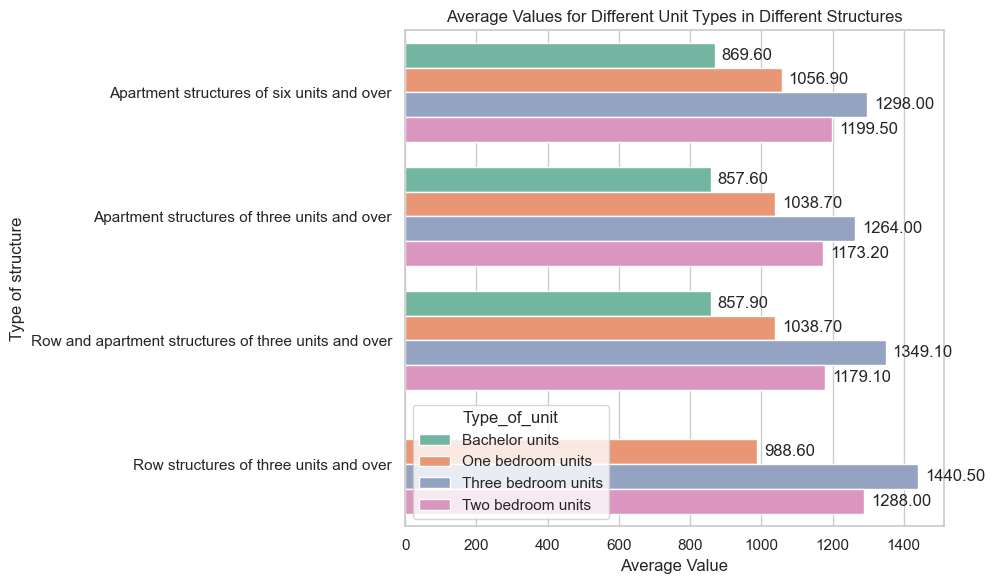

In [403]:
# Assuming Ottawa_Gatineau_2 is a list of dictionaries or a similar data structure
df_4 = pd.DataFrame(Ottawa_Gatineau_2)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped horizontal bar chart with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='avg_value', y='Type_of_structure', hue='Type_of_unit', data=df_4, palette='Set2')

# Set labels and title
plt.xlabel('Average Value')
plt.ylabel('Type of structure')
plt.title('Average Values for Different Unit Types in Different Structures')

# Show the legend
plt.legend(title='Type_of_unit', loc='lower left')

# Annotate each bar with its value
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.2f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Adjust layout to prevent clipping of y-axis labels
plt.tight_layout()

# Show the bar chart
plt.show()

In [345]:
Ottawa_Gatineau_2_ANOVA = Ottawa_Gatineau_2.copy()

In [346]:
Ottawa_Gatineau_2_ANOVA.head(100)

,Type_of_structure,Type_of_unit,avg_value
0,Apartment structures of six units and over,Bachelor units,869.6
1,Apartment structures of six units and over,One bedroom units,1056.9
2,Apartment structures of six units and over,Three bedroom units,1298.0
3,Apartment structures of six units and over,Two bedroom units,1199.5
4,Apartment structures of three units and over,Bachelor units,857.6
5,Apartment structures of three units and over,One bedroom units,1038.7
6,Apartment structures of three units and over,Three bedroom units,1264.0
7,Apartment structures of three units and over,Two bedroom units,1173.2
8,Row and apartment structures of three units an...,Bachelor units,857.9
9,Row and apartment structures of three units an...,One bedroom units,1038.7


In [347]:
from sklearn.preprocessing import LabelEncoder

# Inicijalizujte LabelEncoder za svaku od kolona
label_encoder_structure = LabelEncoder()
label_encoder_unit = LabelEncoder()

# Primena LabelEncoding na odgovarajuće kolone u podacima
Ottawa_Gatineau_2_ANOVA['Type_of_structure'] = label_encoder_structure.fit_transform(Ottawa_Gatineau_2_ANOVA['Type_of_structure'])
Ottawa_Gatineau_2_ANOVA['Type_of_unit'] = label_encoder_unit.fit_transform(Ottawa_Gatineau_2_ANOVA['Type_of_unit'])

In [348]:
#Ottawa_Gatineau_2_ANOVA = pd.get_dummies(Ottawa_Gatineau_2_ANOVA, columns=['Type_of_structure', 'Type_of_unit'], drop_first=True)

In [349]:
Ottawa_Gatineau_2_ANOVA.head(100)

,Type_of_structure,Type_of_unit,avg_value
0,0,0,869.6
1,0,1,1056.9
2,0,2,1298.0
3,0,3,1199.5
4,1,0,857.6
5,1,1,1038.7
6,1,2,1264.0
7,1,3,1173.2
8,2,0,857.9
9,2,1,1038.7


In [404]:
from scipy.stats import f_oneway

# Extract values for each group
groups = {}
for structure, value in zip(Ottawa_Gatineau_2_ANOVA['Type_of_structure'], Ottawa_Gatineau_2_ANOVA['avg_value']):
    key = structure  # Exclude Type_of_unit from grouping
    if key not in groups:
        groups[key] = []
    groups[key].append(value)

# Perform ANOVA test
anova_result = f_oneway(*groups.values())

# Display the ANOVA result
print("ANOVA p-value:", anova_result.pvalue)

# Check if the result is statistically significant
alpha = 0.05
if anova_result.pvalue < alpha:
    print("The result is statistically significant. There are significant differences between groups.")
else:
    print("The result is not statistically significant. There are no significant differences between groups.")


ANOVA p-value: 0.7475882071343141
The result is not statistically significant. There are no significant differences between groups.


In [405]:
from scipy.stats import f_oneway

# Extract values for each group
groups = {}
for structure, value in zip(Ottawa_Gatineau_2_ANOVA['Type_of_unit'], Ottawa_Gatineau_2_ANOVA['avg_value']):
    key = structure  # Exclude Type_of_unit from grouping
    if key not in groups:
        groups[key] = []
    groups[key].append(value)

# Perform ANOVA test
anova_result = f_oneway(*groups.values())

# Display the ANOVA result
print("ANOVA p-value:", anova_result.pvalue)

# Check if the result is statistically significant
alpha = 0.05
if anova_result.pvalue < alpha:
    print("The result is statistically significant. There are significant differences between groups.")
else:
    print("The result is not statistically significant. There are no significant differences between groups.")

ANOVA p-value: 5.17398723806263e-07
The result is statistically significant. There are significant differences between groups.


In [352]:
Ottawa_Gatineau_2_ANOVA.corr()

,Type_of_structure,Type_of_unit,avg_value
Type_of_structure,1.000000,0.136364,0.231702
Type_of_unit,0.136364,1.000000,0.791438
avg_value,0.231702,0.791438,1.000000


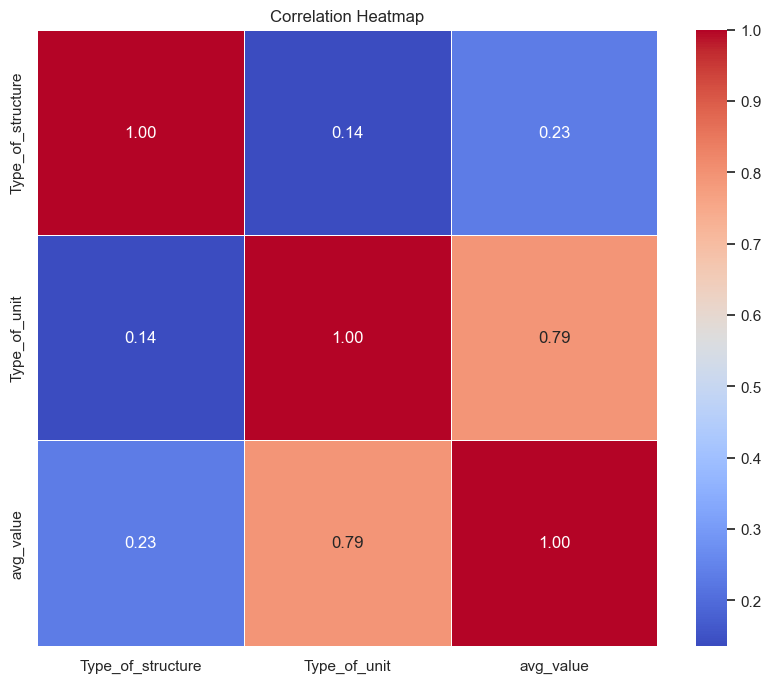

In [353]:
# Dobijanje matrice korelacije
correlation_matrix = Ottawa_Gatineau_2_ANOVA.corr()

# Podešavanje stila za bolju čitljivost
sns.set(style="whitegrid")

# Prikazivanje heatmap korelacije
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

#### c)How the overall average compares to Toronto, Montreal, and Vancouver areas

In [355]:
#selecting data set using SQL
Ottawa_Gatineau_other = sqldf('''select GEO,AVG(VALUE) as avg_value
from df 
where GEO in ('Ottawa-Gatineau, Ontario/Quebec','Toronto, Ontario','Montréal, Quebec','Vancouver, British Columbia') and REF_DATE>2012
group by GEO
order by GEO
''')

In [356]:
Ottawa_Gatineau_other.head()

,GEO,avg_value
0,"Montréal, Quebec",847.437086
1,"Ottawa-Gatineau, Ontario/Quebec",1126.626667
2,"Toronto, Ontario",1391.653061
3,"Vancouver, British Columbia",1487.868750


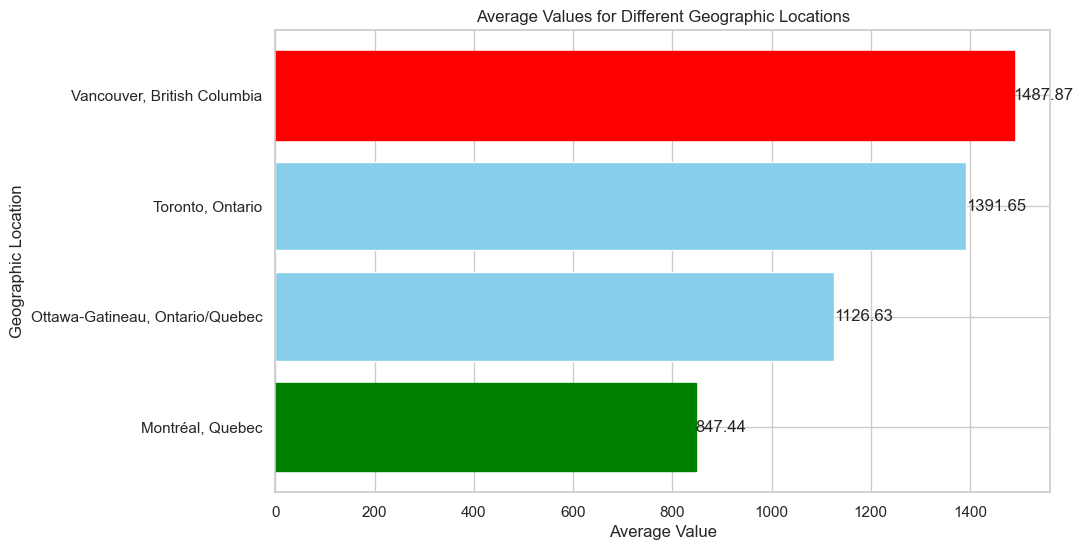

In [357]:
df_5 = pd.DataFrame(Ottawa_Gatineau_other)

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df_5['GEO'], df_5['avg_value'], color='skyblue')

# Highlight the highest bar
max_value_index = df_5['avg_value'].idxmax()
bars[max_value_index].set_color('red')

# Highlight the highest bar
min_value_index = df_5['avg_value'].idxmin()
bars[min_value_index].set_color('green')

# Display values inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Set labels and title
plt.xlabel('Average Value')
plt.ylabel('Geographic Location')
plt.title('Average Values for Different Geographic Locations')

# Show the horizontal bar graph
plt.show()

#### Observation:
In the chart, we can observe that Vancouver, British Columbia, has the highest average rental price, while Montréal, Quebec, has the lowest, compared to the overall average rental price of Ottawa-Gatineau, Ontario/Quebec.


### 2.Provide any additional findings you discovered and found interesting

In [358]:
#selecting data set using SQL
Ottawa_Gatineau_other_1 = sqldf('''select GEO,Type_of_structure,AVG(VALUE) as avg_value
from df 
where GEO in ('Ottawa-Gatineau, Ontario/Quebec','Toronto, Ontario','Montréal, Quebec','Vancouver, British Columbia') and REF_DATE>2012
group by GEO,Type_of_structure
order by GEO,Type_of_structure
''')

In [359]:
Ottawa_Gatineau_other_1.head()

,GEO,Type_of_structure,avg_value
0,"Montréal, Quebec",Apartment structures of six units and over,825.050000
1,"Montréal, Quebec",Apartment structures of three units and over,806.975000
2,"Montréal, Quebec",Row and apartment structures of three units an...,807.350000
3,"Montréal, Quebec",Row structures of three units and over,980.258065
4,"Ottawa-Gatineau, Ontario/Quebec",Apartment structures of six units and over,1106.000000


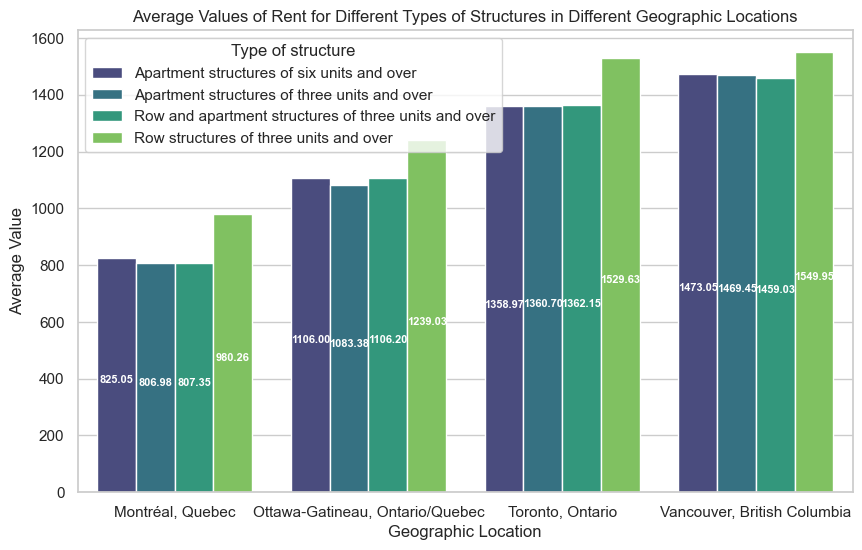

In [360]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar chart with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='GEO', y='avg_value', hue='Type_of_structure', data=df_6, palette='viridis')

# Set labels and title
plt.xlabel('Geographic Location')
plt.ylabel('Average Value')
plt.title('Average Values of Rent for Different Types of Structures in Different Geographic Locations')

# Show the legend
plt.legend(title='Type of structure')

# Add white text labels inside each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 2., height / 2., f'{height:.2f}',
            ha='center', va='top', color='white', fontsize=8, weight='bold')

# Show the grouped bar chart with annotations
plt.show()

In [361]:
#selecting data set using SQL
Ottawa_Gatineau_other_2 = sqldf('''select REF_DATE,GEO,AVG(VALUE) as avg_value,AVG(VALUE) * 100.0 / sum(AVG(VALUE)) over()  as proc_avg_value
from df 
where GEO in ('Ottawa-Gatineau, Ontario/Quebec','Toronto, Ontario','Montréal, Quebec','Vancouver, British Columbia') and REF_DATE>2012
group by REF_DATE,GEO
order by REF_DATE,GEO
''')

In [362]:
Ottawa_Gatineau_other_2.head()

,REF_DATE,GEO,avg_value,proc_avg_value
0,2013,"Montréal, Quebec",747.733333,1.541280
1,2013,"Ottawa-Gatineau, Ontario/Quebec",977.000000,2.013861
2,2013,"Toronto, Ontario",1164.000000,2.399318
3,2013,"Vancouver, British Columbia",1191.937500,2.456905
4,2014,"Montréal, Quebec",748.466667,1.542792


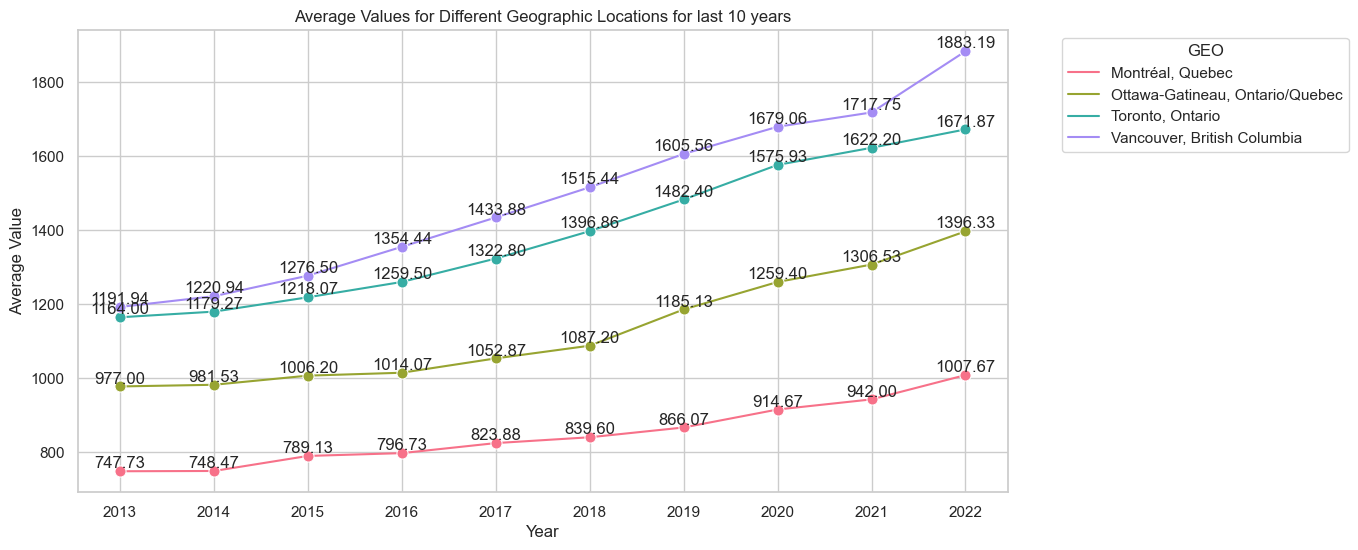

In [363]:
# Define a color palette for both line and bar plots
palette = sns.color_palette("husl", n_colors=len(df_7['GEO'].unique()))

# Create a line chart with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='REF_DATE', y='avg_value', hue='GEO', data=df_7, marker='o', markersize=8, palette=palette)

# Annotate each point with its value in the legend for all years
for geo in df_7['GEO'].unique():
    geo_data = df_7[df_7['GEO'] == geo]
    for index, row in geo_data.iterrows():
        plt.text(row['REF_DATE'], row['avg_value'], f'{row["avg_value"]:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Values for Different Geographic Locations for last 10 years')

# Show the legend
plt.legend(title='GEO', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis tick positions for all years
plt.xticks(df_7['REF_DATE'].unique())

# Show the line chart
plt.show()

#### Observation:

- 10 years ago, the rental prices between Toronto and Vancouver were very close (a difference of $27.94), 10 years later, that gap has increased to $211.32.

- 10 years ago, the rental prices between Ottawa and Montreal were $229.27 today, that gap has increased to $388.66

- All cities have maintained almost similar growth rate.

In [364]:
Ottawa_Gatineau_other_ANOVA = Ottawa_Gatineau_other_2.copy()

In [365]:
from sklearn.preprocessing import LabelEncoder

# Inicijalizujte LabelEncoder za svaku od kolona
label_encoder_structure = LabelEncoder()
label_encoder_unit = LabelEncoder()

# Primena LabelEncoding na odgovarajuće kolone u podacima
Ottawa_Gatineau_other_ANOVA['GEO'] = label_encoder_structure.fit_transform(Ottawa_Gatineau_other_ANOVA['GEO'])

In [366]:
Ottawa_Gatineau_other_ANOVA.head()

,REF_DATE,GEO,avg_value,proc_avg_value
0,2013,0,747.733333,1.541280
1,2013,1,977.000000,2.013861
2,2013,2,1164.000000,2.399318
3,2013,3,1191.937500,2.456905
4,2014,0,748.466667,1.542792


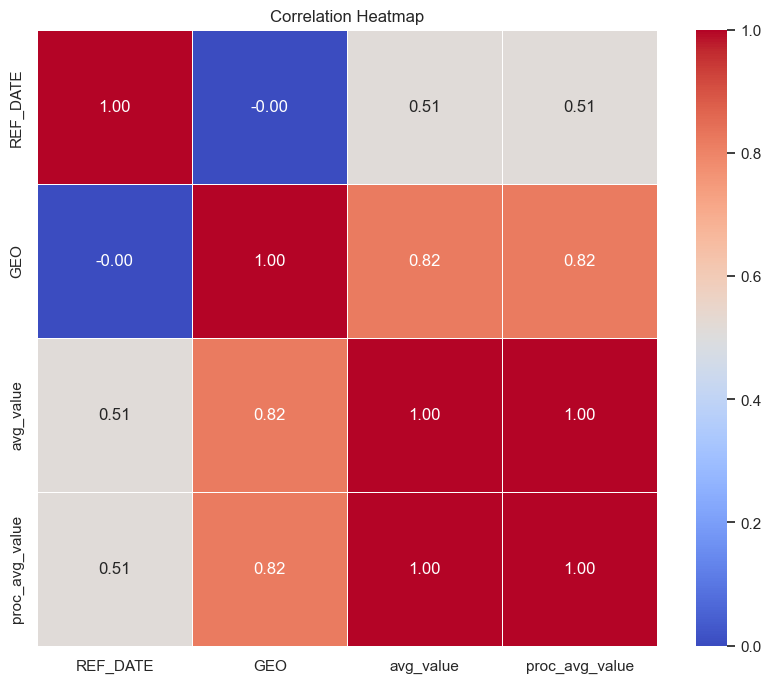

In [367]:
# Dobijanje matrice korelacije
correlation_matrix = Ottawa_Gatineau_other_ANOVA.corr()

# Podešavanje stila za bolju čitljivost
sns.set(style="whitegrid")

# Prikazivanje heatmap korelacije
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [368]:
from scipy.stats import f_oneway

# Extract values for each group
groups = {}
for structure, value in zip(Ottawa_Gatineau_other_ANOVA['GEO'], Ottawa_Gatineau_other_ANOVA['avg_value']):
    key = structure  # Exclude Type_of_unit from grouping
    if key not in groups:
        groups[key] = []
    groups[key].append(value)

# Perform ANOVA test
anova_result = f_oneway(*groups.values())

# Display the ANOVA result
print("ANOVA p-value:", anova_result.pvalue)

# Check if the result is statistically significant
alpha = 0.05
if anova_result.pvalue < alpha:
    print("The test is statistically significant. There are significant differences between groups.")
else:
    print("The test is not statistically significant. There are no significant differences between groups.")

ANOVA p-value: 1.9289119199084733e-09
The test is statistically significant. There are significant differences between groups.


#### Opservation: 
- The result is statistically significant. The avgerege differences in prices between cities are significant and not occurring due to random chance. There are other reasons that drive prices in those cities. 

### 3.Compare the rent growth to the Consumer Price Index (CPI)

##### Rental grouth for Ottawa_Gatineau and CPI for Canada

In [369]:
#selecting data set using SQL
Ottawa_Gatineau = sqldf('''SELECT 
    REF_DATE,
    AVG(VALUE) as avg_value,
    ROUND(100 * (AVG(VALUE) / LAG(AVG(VALUE)) OVER (ORDER BY REF_DATE) - 1),2) AS percentage_growth
FROM df 
WHERE GEO='Ottawa-Gatineau, Ontario/Quebec'
GROUP BY REF_DATE
ORDER BY REF_DATE;
''')

In [370]:
Ottawa_Gatineau.head(20)

,REF_DATE,avg_value,percentage_growth
0,2012,963.666667,NaN
1,2013,977.000000,1.38
2,2014,981.533333,0.46
3,2015,1006.200000,2.51
4,2016,1014.066667,0.78
5,2017,1052.866667,3.83
6,2018,1087.200000,3.26
7,2019,1185.133333,9.01
8,2020,1259.400000,6.27
9,2021,1306.533333,3.74


In [371]:
#import file for CPI
df_CPI = pd.read_csv('data/CPI.csv')
df_CPI.head()

,REF_DATE,GEO,DGUID,Products_and_product_groups,VALUE
0,2012,Canada,2016A000011124,All-items,121.7
1,2012,Canada,2016A000011124,Rent,113.6
2,2012,Quebec,2016A000224,All-items,120.8
3,2012,Quebec,2016A000224,Rent,112.4
4,2012,Ontario,2016A000235,All-items,121.8


In [372]:
#selecting data set using SQL
df_CPI_Canada_Rent = sqldf('''SELECT REF_DATE,GEO,Products_and_product_groups,
VALUE,ROUND(100 * (VALUE / LAG(VALUE) OVER (ORDER BY REF_DATE,GEO,Products_and_product_groups) - 1),2) AS percentage_growth
FROM df_CPI 
WHERE GEO='Canada' and Products_and_product_groups='Rent'
group by REF_DATE,GEO,Products_and_product_groups
ORDER BY REF_DATE;
''')

In [373]:
df_CPI_Canada_Rent.head(11)

,REF_DATE,GEO,Products_and_product_groups,VALUE,percentage_growth
0,2012,Canada,Rent,113.6,NaN
1,2013,Canada,Rent,115.4,1.58
2,2014,Canada,Rent,117.1,1.47
3,2015,Canada,Rent,118.5,1.20
4,2016,Canada,Rent,119.2,0.59
5,2017,Canada,Rent,119.9,0.59
6,2018,Canada,Rent,121.3,1.17
7,2019,Canada,Rent,124.7,2.80
8,2020,Canada,Rent,126.8,1.68
9,2021,Canada,Rent,128.8,1.58


In [374]:
#selecting data set using SQL
df_CPI_Canada_All = sqldf('''SELECT REF_DATE,GEO,Products_and_product_groups,VALUE,
ROUND(100 * (VALUE / LAG(VALUE) OVER (ORDER BY REF_DATE,GEO,Products_and_product_groups) - 1),2) AS percentage_growth
FROM df_CPI 
WHERE GEO='Canada' and Products_and_product_groups='All-items'
group by REF_DATE,GEO,Products_and_product_groups
ORDER BY REF_DATE;
''')

In [375]:
df_CPI_Canada_All.head(11)

,REF_DATE,GEO,Products_and_product_groups,VALUE,percentage_growth
0,2012,Canada,All-items,121.7,NaN
1,2013,Canada,All-items,122.8,0.90
2,2014,Canada,All-items,125.2,1.95
3,2015,Canada,All-items,126.6,1.12
4,2016,Canada,All-items,128.4,1.42
5,2017,Canada,All-items,130.4,1.56
6,2018,Canada,All-items,133.4,2.30
7,2019,Canada,All-items,136.0,1.95
8,2020,Canada,All-items,137.0,0.74
9,2021,Canada,All-items,141.6,3.36


In [376]:
#selecting data set using SQL
df_grouth_CPI_Canada = sqldf('''SELECT a.REF_DATE, a.avg_value, a.percentage_growth as rent_growth, b.percentage_growth AS cpi_rent, c.percentage_growth AS cpi_all
FROM Ottawa_Gatineau a
LEFT JOIN df_CPI_Canada_Rent b ON a.REF_DATE = b.REF_DATE
LEFT JOIN df_CPI_Canada_All c ON a.REF_DATE = c.REF_DATE
where a.REF_DATE>2012
ORDER BY a.REF_DATE;
''')

In [377]:
df_grouth_CPI_Canada.head(20)

,REF_DATE,avg_value,rent_growth,cpi_rent,cpi_all
0,2013,977.000000,1.38,1.58,0.90
1,2014,981.533333,0.46,1.47,1.95
2,2015,1006.200000,2.51,1.20,1.12
3,2016,1014.066667,0.78,0.59,1.42
4,2017,1052.866667,3.83,0.59,1.56
5,2018,1087.200000,3.26,1.17,2.30
6,2019,1185.133333,9.01,2.80,1.95
7,2020,1259.400000,6.27,1.68,0.74
8,2021,1306.533333,3.74,1.58,3.36
9,2022,1396.333333,6.87,4.58,6.78


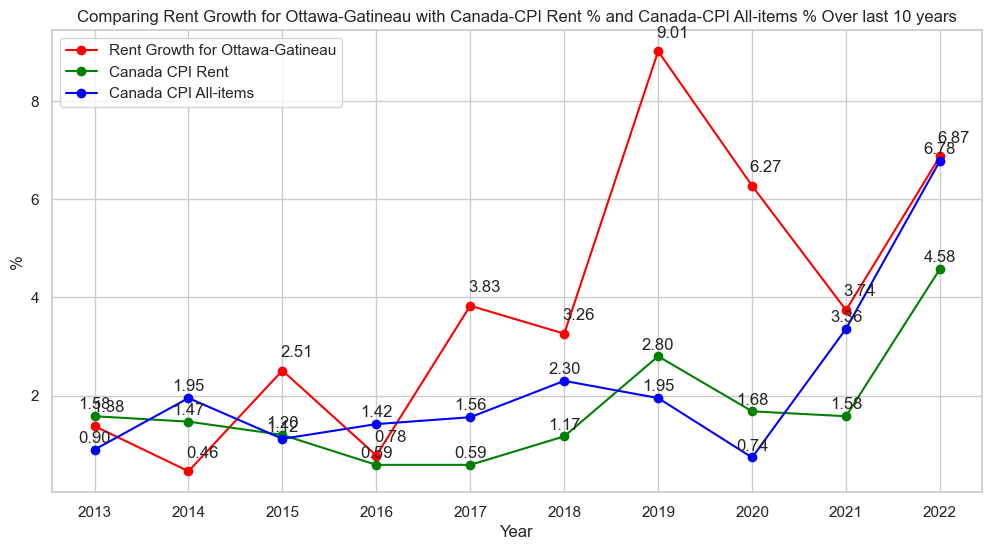

In [407]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

# Plotting lines with custom colors
plt.plot(df_grouth_CPI_Canada['REF_DATE'], df_grouth_CPI_Canada['rent_growth'], marker='o', label='Rent Growth for Ottawa-Gatineau', color='red')
plt.plot(df_grouth_CPI_Canada['REF_DATE'], df_grouth_CPI_Canada['cpi_rent'], marker='o', label='Canada CPI Rent', color='green')
plt.plot(df_grouth_CPI_Canada['REF_DATE'], df_grouth_CPI_Canada['cpi_all'], marker='o', label='Canada CPI All-items', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Comparing Rent Growth for Ottawa-Gatineau with Canada-CPI Rent % and Canada-CPI All-items % Over last 10 years')

# Set x-axis tick positions for all years
plt.xticks(df_grouth_CPI_Canada['REF_DATE'].unique())

# Show the legend
plt.legend()

    
# Add annotations
for index, row in df_grouth_CPI_Canada.iterrows():
    plt.annotate(f'{row["rent_growth"]:.2f}', (row['REF_DATE'], row['rent_growth']), textcoords="offset points", xytext=(10, 10), ha='center')
    plt.annotate(f'{row["cpi_rent"]:.2f}', (row['REF_DATE'], row['cpi_rent']), textcoords="offset points", xytext=(0, 5),  ha='center')
    plt.annotate(f'{row["cpi_all"]:.2f}', (row['REF_DATE'], row['cpi_all']), textcoords="offset points", xytext=(0, 5),  ha='center')


# Show the line chart with annotations
plt.show()    


#### Observations:
The rent growth rate follows the Consumer Price Index (CPI) for both rent and all items. As the CPI increases, the rent growth rate also increases. Conversely, when the Consumer Price Index decreases, the rent growth rate decreases.
In 2019, during the pandemic, both the rent growth rate and the Consumer Price Index decreased.

In [379]:
#selecting data set using SQL
df_CPI_Ontario_Rent = sqldf('''SELECT REF_DATE,GEO,Products_and_product_groups,VALUE,ROUND(100 * (VALUE / LAG(VALUE) OVER (ORDER BY REF_DATE,GEO,Products_and_product_groups) - 1),2) AS percentage_growth
FROM df_CPI 
WHERE GEO='Ontario' and Products_and_product_groups='Rent'
group by REF_DATE,GEO,Products_and_product_groups
ORDER BY REF_DATE;
''')

In [380]:
df_CPI_Ontario_Rent.head()

,REF_DATE,GEO,Products_and_product_groups,VALUE,percentage_growth
0,2012,Ontario,Rent,111.5,NaN
1,2013,Ontario,Rent,113.4,1.70
2,2014,Ontario,Rent,114.9,1.32
3,2015,Ontario,Rent,116.1,1.04
4,2016,Ontario,Rent,117.3,1.03


In [381]:
#selecting data set using SQL
df_CPI_Quebec_Rent = sqldf('''SELECT REF_DATE,GEO,Products_and_product_groups,VALUE,ROUND(100 * (VALUE / LAG(VALUE) OVER (ORDER BY REF_DATE,GEO,Products_and_product_groups) - 1),2) AS percentage_growth
FROM df_CPI 
WHERE GEO='Quebec' and Products_and_product_groups='Rent'
group by REF_DATE,GEO,Products_and_product_groups
ORDER BY REF_DATE;
''')

In [382]:
df_CPI_Quebec_Rent.head()

,REF_DATE,GEO,Products_and_product_groups,VALUE,percentage_growth
0,2012,Quebec,Rent,112.4,NaN
1,2013,Quebec,Rent,113.7,1.16
2,2014,Quebec,Rent,115.1,1.23
3,2015,Quebec,Rent,116.2,0.96
4,2016,Quebec,Rent,117.1,0.77


In [383]:
#selecting data set using SQL
df_grouth_CPI_Ontario_Quebec = sqldf('''SELECT a.REF_DATE, a.percentage_growth as rent_growth_Ottawa_Gatineau, b.percentage_growth AS cpi_rent_Ontario, c.percentage_growth AS cpi_rent_Quebec
FROM Ottawa_Gatineau a
LEFT JOIN df_CPI_Ontario_Rent b ON a.REF_DATE = b.REF_DATE
LEFT JOIN df_CPI_Quebec_Rent c ON a.REF_DATE = c.REF_DATE
where a.REF_DATE>2012
ORDER BY a.REF_DATE;
''')

In [384]:
df_grouth_CPI_Ontario_Quebec.head(20)

,REF_DATE,rent_growth_Ottawa_Gatineau,cpi_rent_Ontario,cpi_rent_Quebec
0,2013,1.38,1.70,1.16
1,2014,0.46,1.32,1.23
2,2015,2.51,1.04,0.96
3,2016,0.78,1.03,0.77
4,2017,3.83,0.94,0.77
5,2018,3.26,1.44,0.76
6,2019,9.01,3.75,1.93
7,2020,6.27,1.69,1.24
8,2021,3.74,1.50,2.69
9,2022,6.87,5.52,3.65


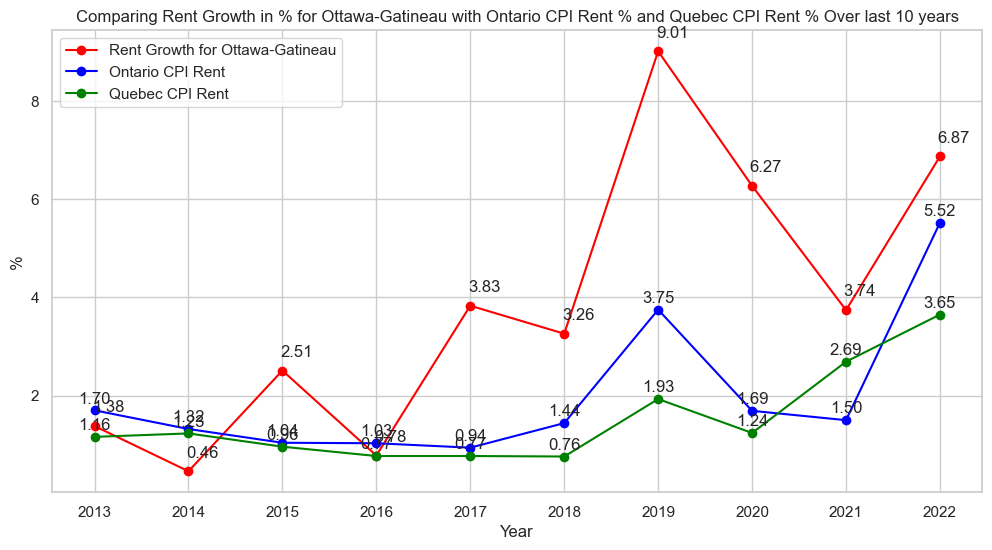

In [408]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 6))

# Plotting lines with custom colors
plt.plot(df_grouth_CPI_Ontario_Quebec['REF_DATE'], df_grouth_CPI_Ontario_Quebec['rent_growth_Ottawa_Gatineau'], marker='o', label='Rent Growth for Ottawa-Gatineau', color='red')
plt.plot(df_grouth_CPI_Ontario_Quebec['REF_DATE'], df_grouth_CPI_Ontario_Quebec['cpi_rent_Ontario'], marker='o', label='Ontario CPI Rent', color='blue')
plt.plot(df_grouth_CPI_Ontario_Quebec['REF_DATE'], df_grouth_CPI_Ontario_Quebec['cpi_rent_Quebec'], marker='o', label='Quebec CPI Rent', color='green')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Comparing Rent Growth in % for Ottawa-Gatineau with Ontario CPI Rent % and Quebec CPI Rent % Over last 10 years')

# Set x-axis tick positions for all years
plt.xticks(df_grouth_CPI_Ontario_Quebec['REF_DATE'].unique())

# Show the legend
plt.legend()

# Add annotations
for index, row in df_grouth_CPI_Ontario_Quebec.iterrows():
    plt.annotate(f'{row["rent_growth_Ottawa_Gatineau"]:.2f}', (row['REF_DATE'], row['rent_growth_Ottawa_Gatineau']), textcoords="offset points", xytext=(10, 10), ha='center')
    plt.annotate(f'{row["cpi_rent_Ontario"]:.2f}', (row['REF_DATE'], row['cpi_rent_Ontario']), textcoords="offset points", xytext=(0, 5),  ha='center')
    plt.annotate(f'{row["cpi_rent_Quebec"]:.2f}', (row['REF_DATE'], row['cpi_rent_Quebec']), textcoords="offset points", xytext=(0, 5),  ha='center')

# Show the line chart with annotations
plt.show()

#### Opservations:
Historically, the Consumer Price Index (CPI) for rent in Ontario has always been higher than that in Quebec. In 2021, it fell below, but corrected in 2022.

In [387]:
df_grouth_CPI_Canada.head(100)

,REF_DATE,avg_value,rent_growth,cpi_rent,cpi_all
0,2013,977.000000,1.38,1.58,0.90
1,2014,981.533333,0.46,1.47,1.95
2,2015,1006.200000,2.51,1.20,1.12
3,2016,1014.066667,0.78,0.59,1.42
4,2017,1052.866667,3.83,0.59,1.56
5,2018,1087.200000,3.26,1.17,2.30
6,2019,1185.133333,9.01,2.80,1.95
7,2020,1259.400000,6.27,1.68,0.74
8,2021,1306.533333,3.74,1.58,3.36
9,2022,1396.333333,6.87,4.58,6.78


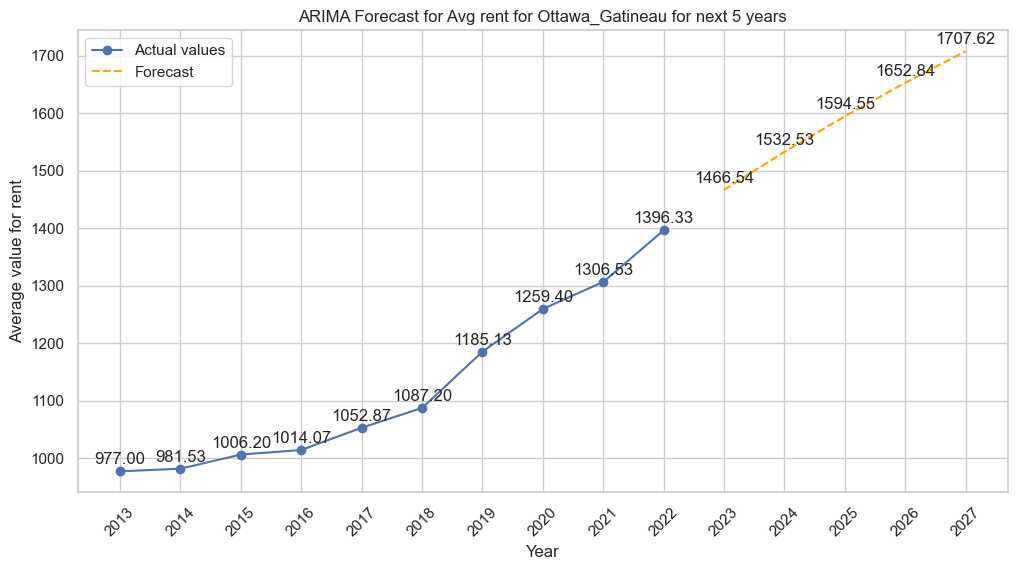

In [394]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

# Copy the dataframe
df_f = df_grouth_CPI_Canada.copy()

# Convert 'REF_DATE' to dates
df_f['REF_DATE'] = pd.to_datetime(df_f['REF_DATE'], format='%Y')

# Check if the index is monotonically increasing
if not df_f['REF_DATE'].is_monotonic_increasing:
    df_f = df_f.sort_values('REF_DATE')

# Set 'REF_DATE' as the index
df_f = df_f.set_index('REF_DATE')

# Fit ARIMA model
model = ARIMA(df_f['avg_value'], order=(1, 1, 1))  # Adjust order as needed
fit_model = model.fit()

# Make forecasts for the next 5 years (adjust the number of points you want to predict)
forecast_steps = 5
forecast_index = pd.date_range(start=df_f.index[-1], periods=forecast_steps, freq='Y')  # Use the last known date
forecast = fit_model.get_forecast(steps=len(forecast_index))

# Display the results
plt.figure(figsize=(12, 6))
plt.plot(df_f.index, df_f['avg_value'], label='Actual values', marker='o')

# Add annotations for actual values
for i, txt in enumerate(df_f['avg_value']):
    plt.annotate(f'{txt:.2f}', (df_f.index[i], txt), textcoords="offset points", xytext=(0, 5), ha='center')

# Add annotations for forecasts
for i, txt in enumerate(forecast.predicted_mean):
    plt.annotate(f'{txt:.2f}', (forecast_index[i], txt), textcoords="offset points", xytext=(0, 5), ha='center')

# Add a line for forecasts
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', linestyle='dashed', color='orange')

plt.xlabel('Year')
plt.ylabel('Average value for rent')
plt.title('ARIMA Forecast for Avg rent for Ottawa_Gatineau for next 5 years')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Set date formatting to year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set ticks for each year
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()